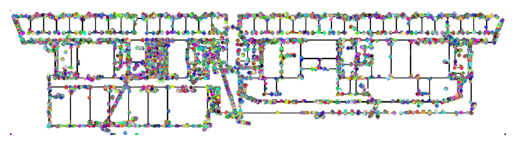

In [5]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im = cv.imread('/Users/luq/dev/projects/ucsc-research/cv-floorplan/hough/img/reassembled_E2_2.png')
assert im is not None, "file could not be read, check with os.path.exists()"

imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# Loop through all contours
for contour in contours:
    # Loop through each point in the contour
    for pt in contour:
        # Generate a random color for each point
        color = (np.random.randint(0, 255), np.random.randint(0, 255), np.random.randint(0, 255))

        # Draw the point on the image
        # pt[0] contains the x and y coordinates of the point
        cv.circle(im, tuple(pt[0]), 4, color, -1)  # Radius is set to 3 pixels

# Display the image
plt.imshow(im)
plt.axis('off')  # To turn off axis labels
plt.show()

In [3]:
import numpy as np
import pandas as pd
import cv2 as cv

# Function to convert and flip contours to CSV format
def contours_to_csv(contours, img_height):
    line_segments = []
    for contour in contours:
        for i in range(len(contour) - 1):
            start_point = contour[i][0].copy()
            end_point = contour[i + 1][0].copy()

            # Flip the y-coordinates
            start_point[1] = img_height - 1 - start_point[1]
            end_point[1] = img_height - 1 - end_point[1]

            line_segments.append(np.concatenate((start_point/10, end_point/10))) # dividing by 10 for scaling

    df = pd.DataFrame(line_segments)
    return df

img_height = im.shape[0]

# Assuming contours are already calculated
# contours, hierarchy = cv.findContours(...)

# Convert contours to CSV format
csv_data_from_contours = contours_to_csv(contours, img_height)

# Specify the output path for the CSV file
output_csv_path = 'converted_contours.csv'

# Write the DataFrame to a CSV file
csv_data_from_contours.to_csv(output_csv_path, index=False)

print(f"Contours data saved to {output_csv_path}")

Contours data saved to converted_contours.csv
